In [1]:
import os
# import drjit
gpu_num = 3 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
import pickle
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
from jammer.utils import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy
from pathlib import Path

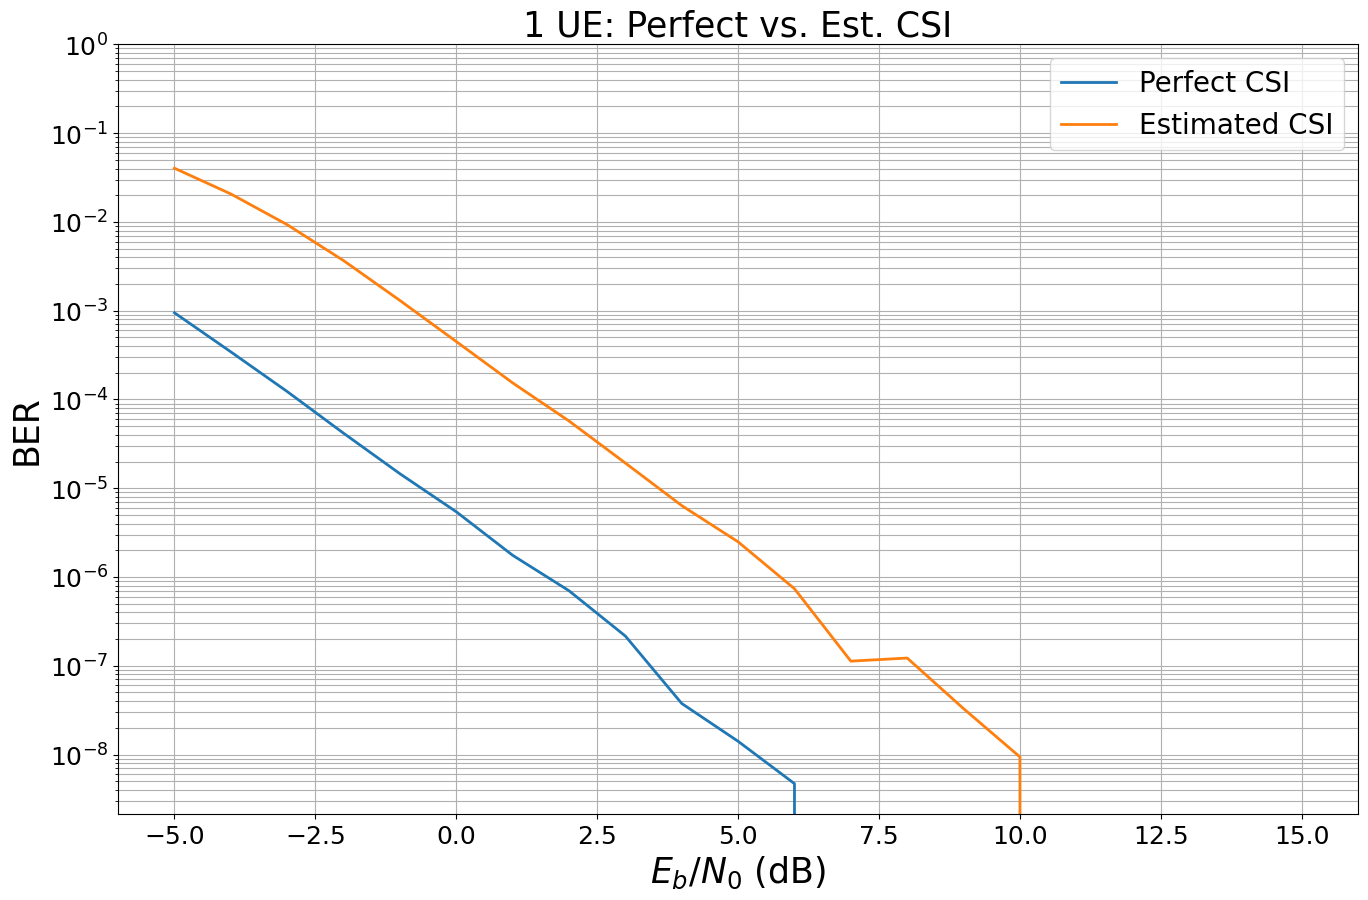

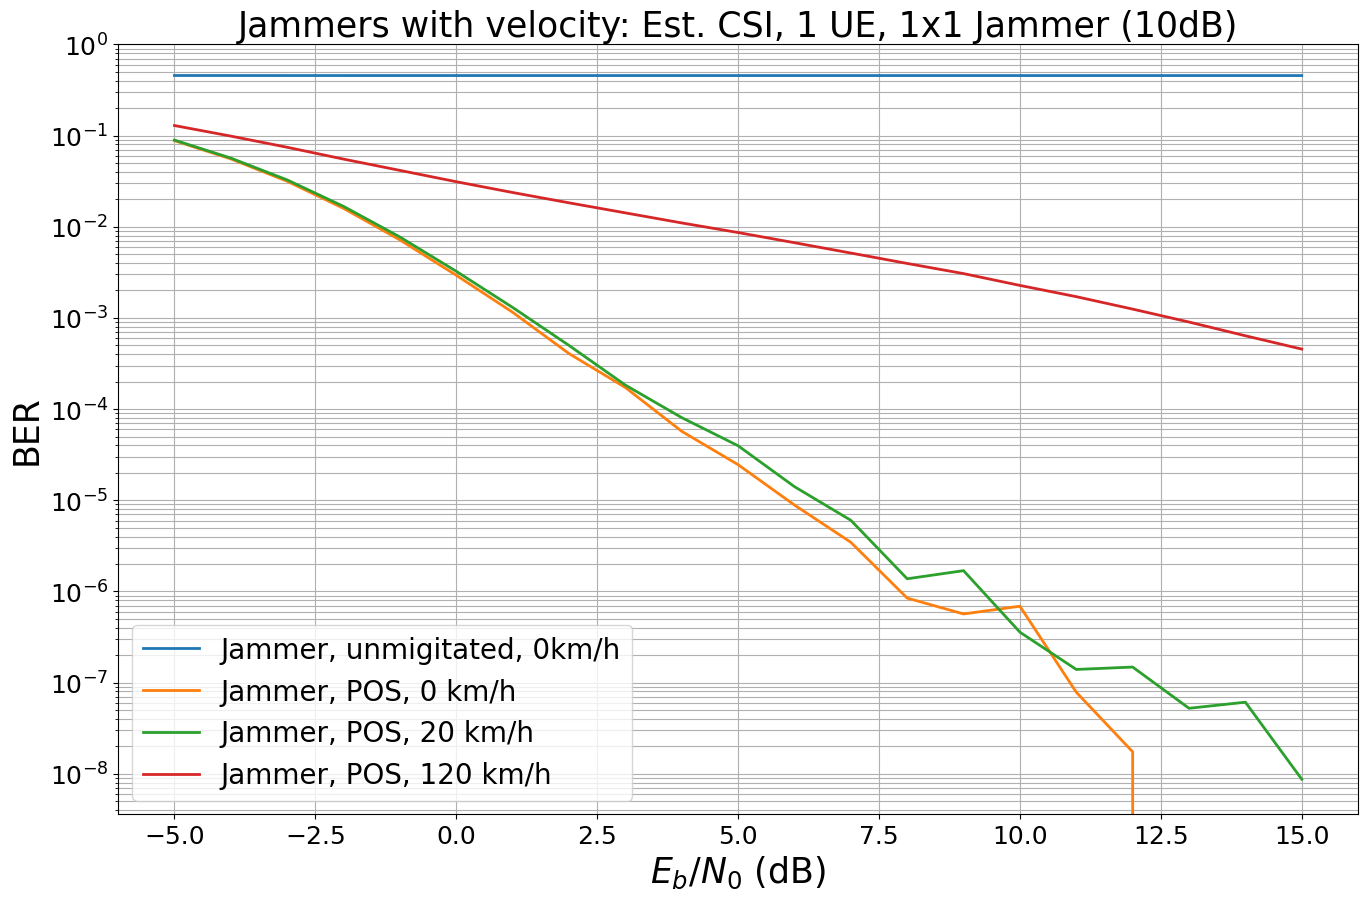

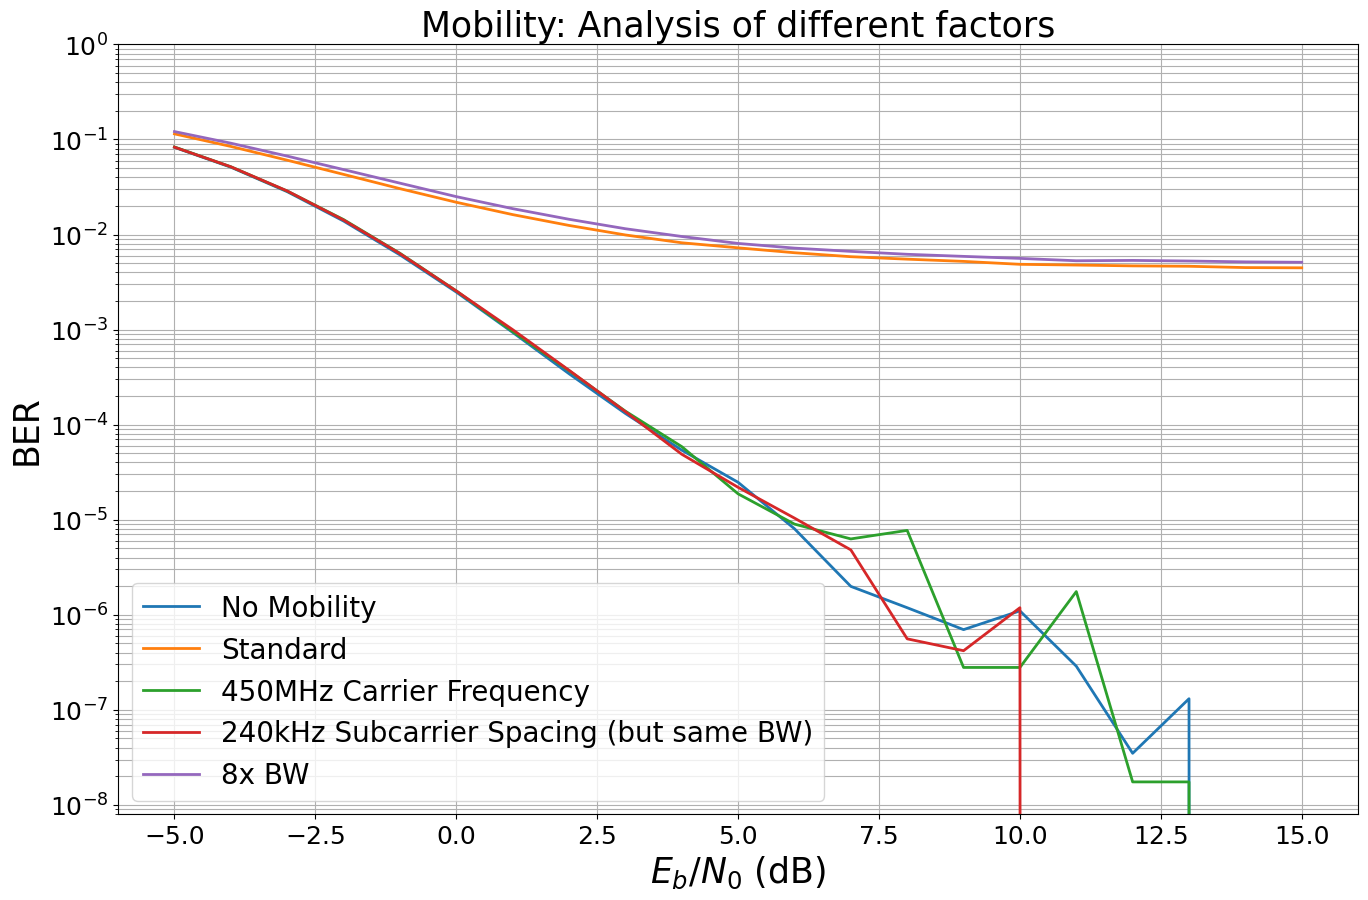

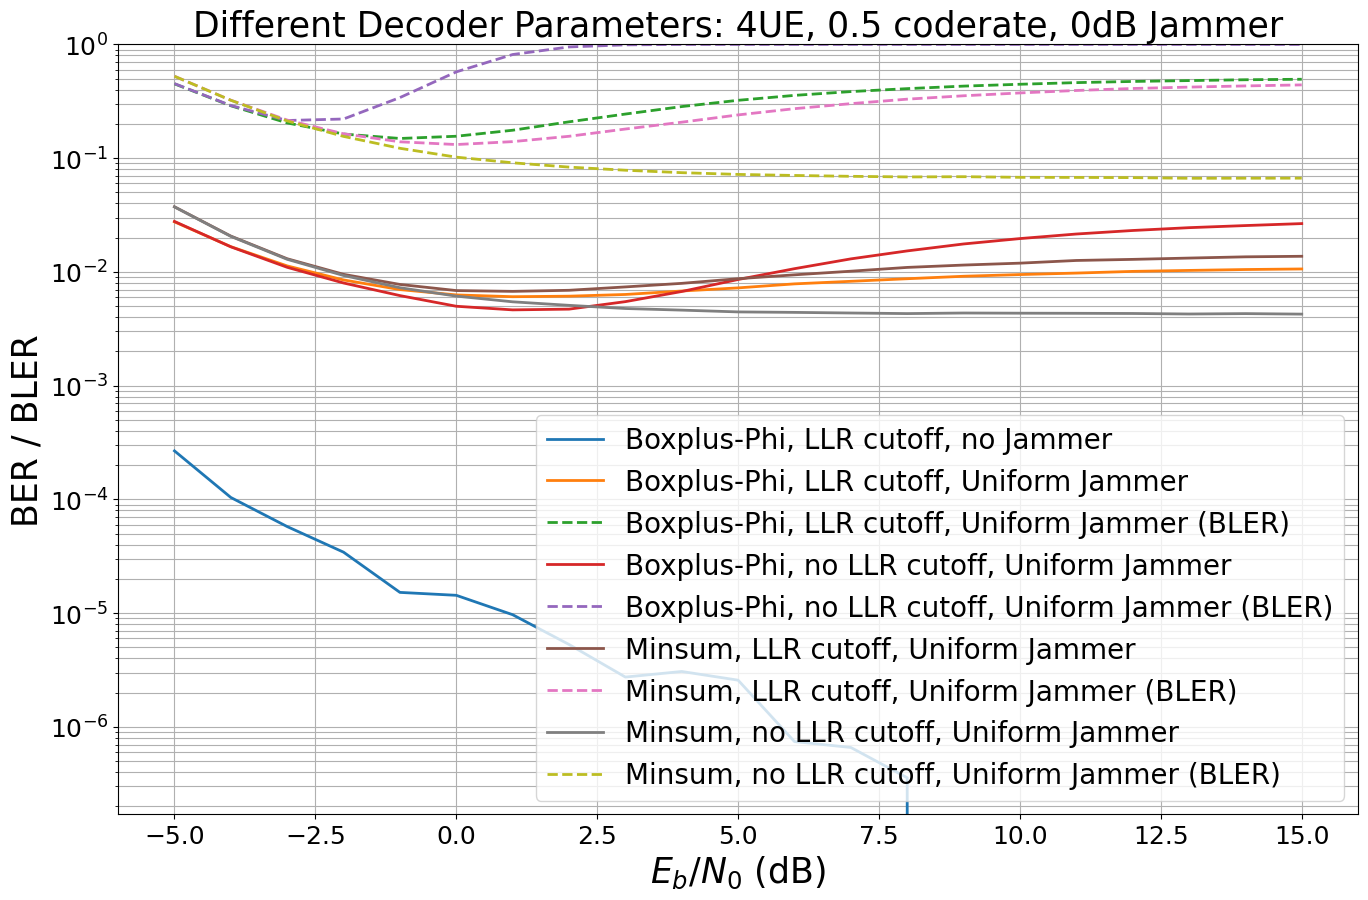

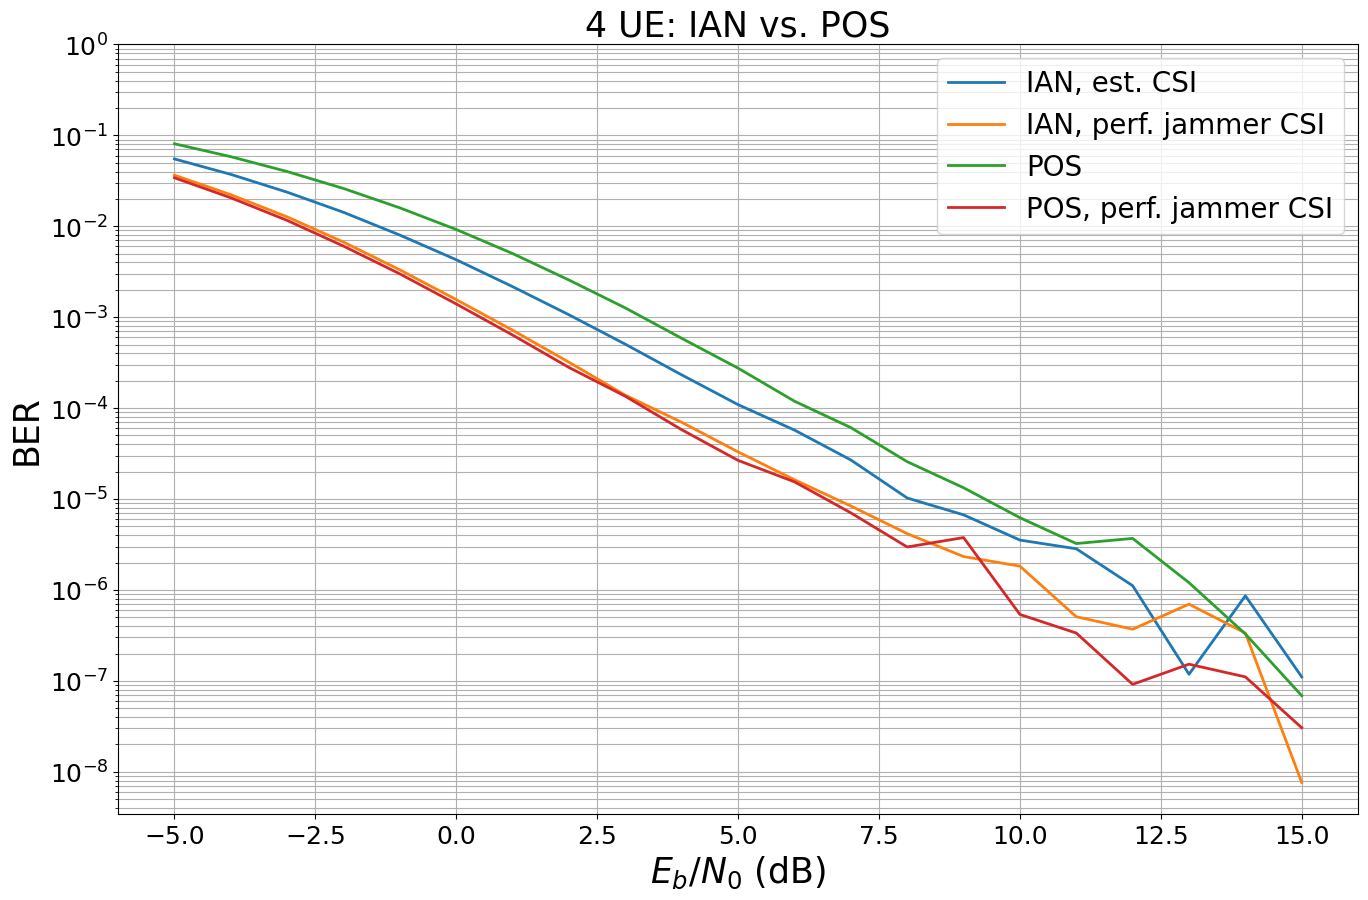

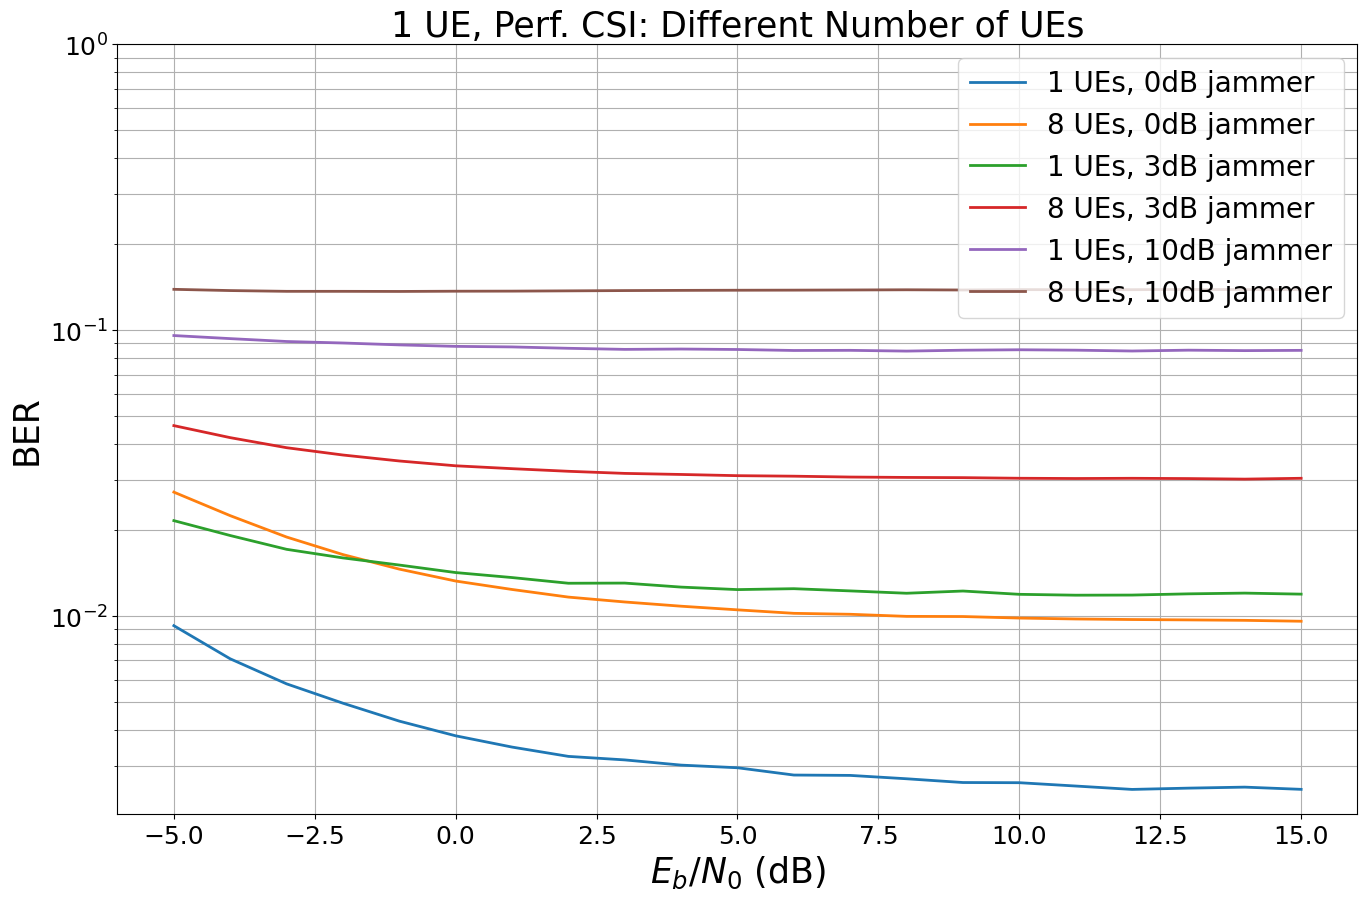

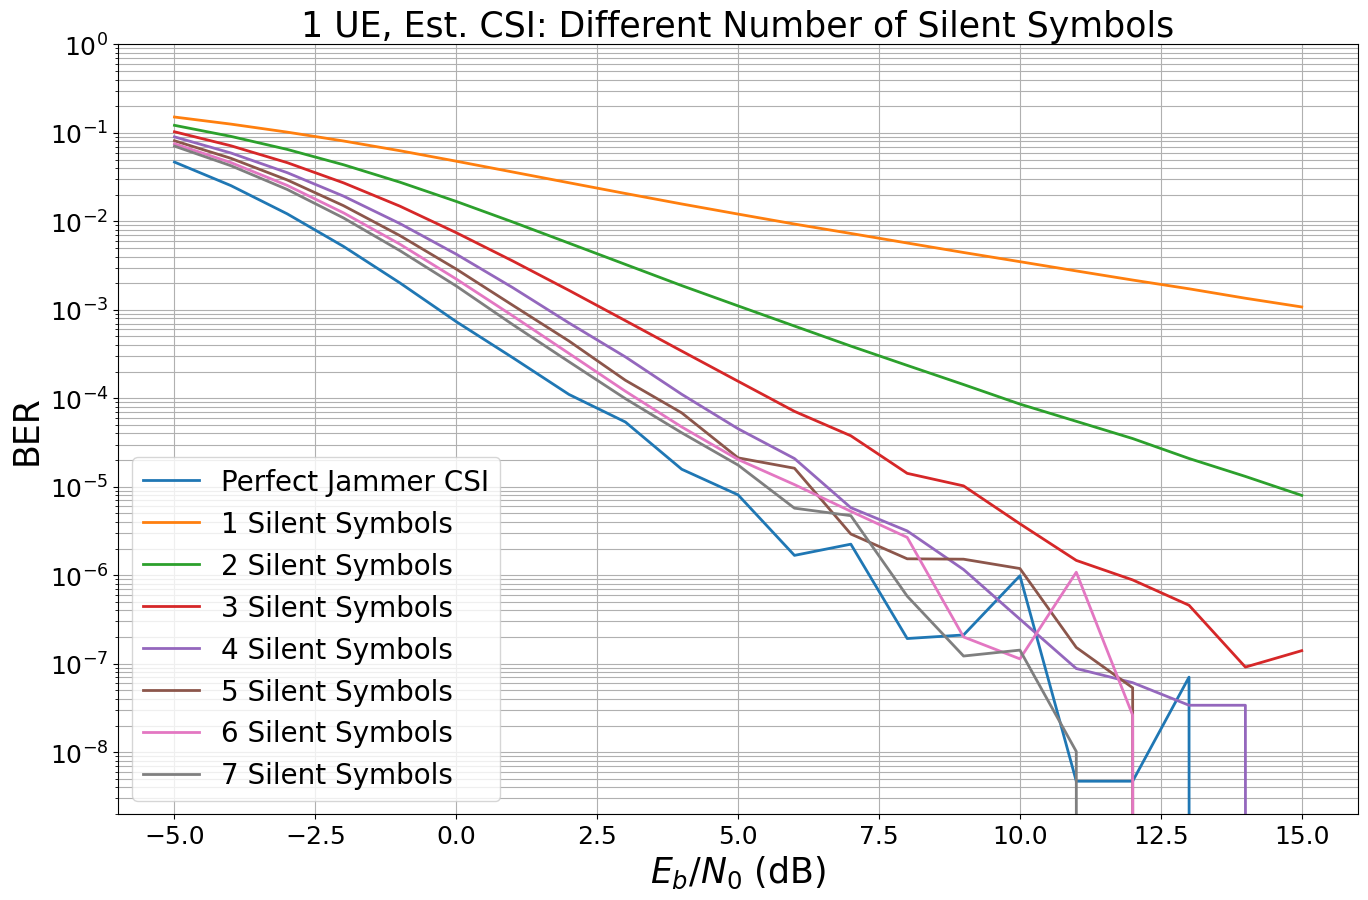

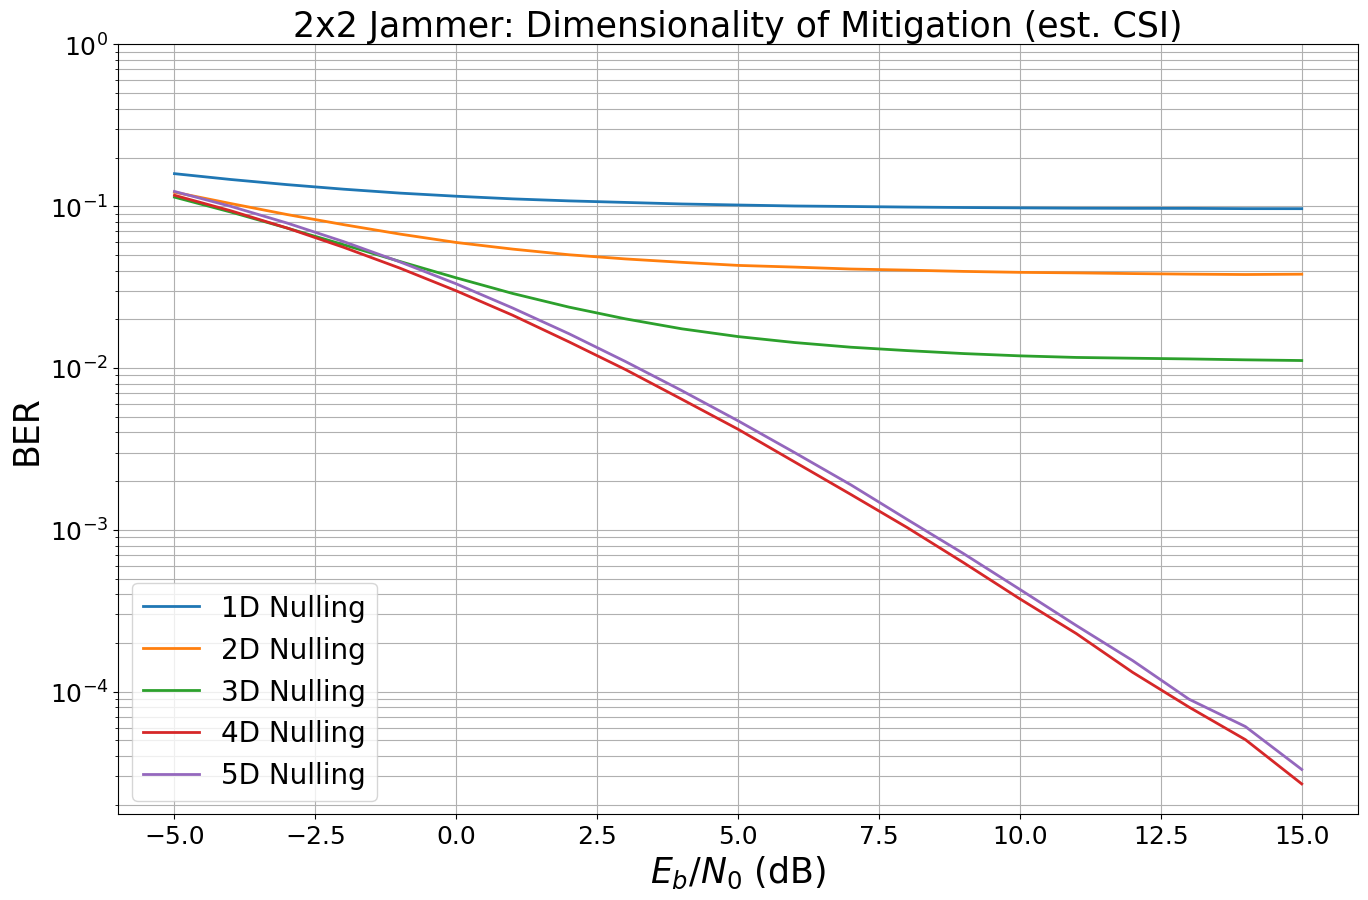

In [2]:
exclude_list = ['bers/report/singular_values.pickle']
files = Path('bers/report').glob('**/*.pickle')
for f in files:
    if str(f) not in exclude_list:
        with open(f, 'rb') as file:
            ber = pickle.load(file)
            ber(ylim=(None, 1))
            # ber(ylim=(1e-6, 1))